In [82]:
import numpy as np
x=[20,25,30,34,40]
y=[26,30,40,48,66]
sx = (np.array(x) - np.mean(x))**2
sx = np.sum(sx)/(len(sx)-1) #표본집단으로 해서 n-1
sx = np.sqrt(sx)

sy = (np.array(y) - np.mean(y))**2
sy = np.sum(sy)/(len(sy)-1)
sy = np.sqrt(sy)

x_x = np.array(x) - np.mean(x)
y_y = np.array(y) - np.mean(y)

r = np.sum((x_x/sx) * (y_y)/sy) / (len(x) -1)
r

0.9785212611534364

In [36]:
import numpy as np
import pandas as pd
x=[20,25,30,34,40]
y=[26,30,40,48,66]
df=pd.DataFrame({'x':x,'y':y})

print(df)
df.corr()
print(df.corr(method='pearson'))   # method 생략하면 기본 pearson

df['x'].corr(df['y'])

    x   y
0  20  26
1  25  30
2  30  40
3  34  48
4  40  66
          x         y
x  1.000000  0.978521
y  0.978521  1.000000


0.9785212611534365

In [41]:
r = df['x'].corr(df['y'])
w = r * df['y'].std() / df['x'].std() #기울기 구하기
w

2.0099667774086383

In [47]:
# 절편값 구하기

b = df.y.mean() - (df.x.mean()*w)
b

-17.897009966777425

In [49]:
# 선형회귀 공식 차트화

df['lr'] = df.x * w + b
df['error'] = df.y - df.lr
df['error2'] = df.error**2
df

,x,y,lr,error,error2
0,20,26,22.302326,3.697674,13.672796
1,25,30,32.352159,-2.352159,5.532654
2,30,40,42.401993,-2.401993,5.769572
3,34,48,50.441860,-2.441860,5.962683
4,40,66,62.501661,3.498339,12.238375


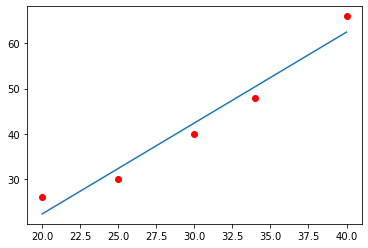

In [50]:
import matplotlib.pyplot as plt
plt.plot(df['x'],df['y'],'ro')
plt.plot(df['x'],df['lr'])  # wx+b

In [51]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [52]:
x = df.x.values
y = df.y.values
print(np.shape(x))
x

(5,)


array([20, 25, 30, 34, 40], dtype=int64)

In [53]:
x1 = x.reshape(-1,1)
print(np.shape(x1))
x1

(5, 1)


array([[20],
       [25],
       [30],
       [34],
       [40]], dtype=int64)

In [55]:
x = df.x.values.reshape(-1,1)
y = df.y.values.reshape(-1,1)
model.fit(x,y)


LinearRegression()

In [58]:
model.predict([[3]])

array([[-11.86710963]])

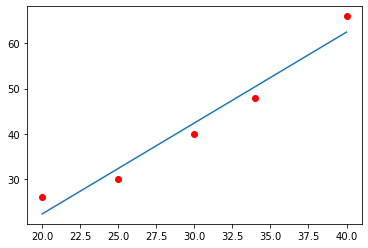

In [60]:
plt.plot(x,y,'ro')
plt.plot(x, model.predict(x))

In [63]:
y_hat = model.predict(x)
print(y_hat**2)
print(x*model.coef_ + model.intercept_)

[[ 497.39372634]
 [1046.66222227]
 [1797.92904052]
 [2544.38128718]
 [3906.45764396]]
[[22.30232558]
 [32.35215947]
 [42.40199336]
 [50.44186047]
 [62.50166113]]


In [65]:
from sklearn.metrics import mean_squared_error
y_hat = model.predict(x)
mean_squared_error(y, y_hat) # 에러값 찾는다 sum해서

8.635215946843852

In [66]:
SSE=np.sum((y-model.predict(x))**2)
print('SSE:%.2f' % SSE)   # rss값은 sse값임. 
TSS=np.sum((y-np.mean(y))**2)
print('TSS:%.2f' % TSS)

print('R2= 1-SSE/TSS: %.2f'% (1-SSE/TSS ))

SSE:43.18
TSS:1016.00
R2= 1-SSE/TSS: 0.96


In [67]:
from sklearn.metrics import r2_score
y_hat=x*model.coef_+model.intercept_
print(y_hat)
r2_score(y,y_hat)  # 사이킷런 제공 R2값

[[22.30232558]
 [32.35215947]
 [42.40199336]
 [50.44186047]
 [62.50166113]]


0.9575038585293117

In [68]:
import pickle
filename='StartLr.sav'
pickle.dump(model,open(f'../data/{filename}','wb'))